1 - Importando bibliotecas necessárias

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

2 - Realizando leitura e análises iniciais dos dados

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Simos-Sigurd/TCC/main/Base%20de%20dados%20ideal%20(StudentsPerformance%20-%20Kaggle).csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Renomeando algumas colunas para deixar a leitura mais simples.

In [ ]:
df.rename(columns = {"gender":"Gênero","race/ethnicity":"Etnia","parental level of education":"Educacao_Pais",
                    "lunch":"Lanche","math score":"Matematica","reading score":"Leitura","writing score":"Escrita",
                    "test preparation course":"Pre_Teste"}, inplace = True)
df.head()

,Gênero,Etnia,Educacao_Pais,Lanche,Pre_Teste,Matematica,Leitura,Escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Vamos checar a performance de cada campo entre homens e mulheres:

<ipython-input-14-bbd8a3683ed0>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, idx+1)


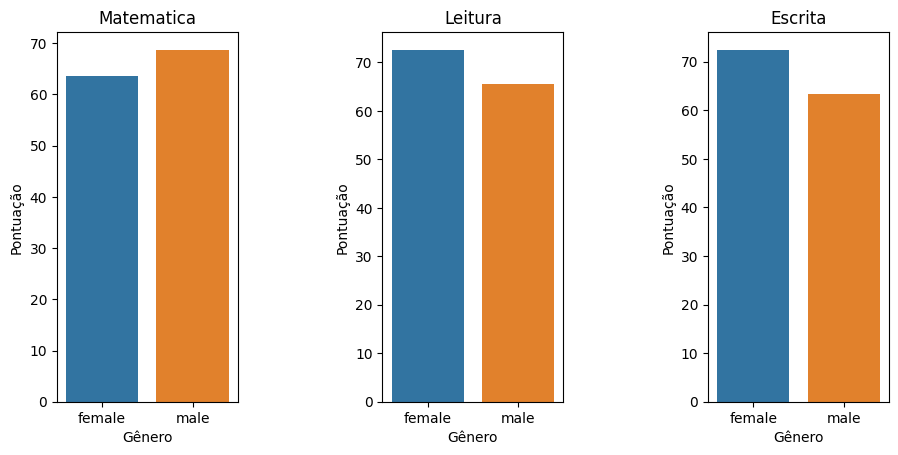

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)

for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = df.groupby("Gênero")[list(df.columns[-3:])[idx]].describe()
    sns.barplot(x = gender_df.index, y = gender_df.loc[:,"mean"].values)
    plt.ylabel("Pontuação")
    plt.title(list(df.columns[-3:])[idx])

plt.show()

Nós podemos ver que os homens tiveram uma performance melhor em Matemática, mas foram piores em Leitura e Escrita. Agora vamos ver a perfomance por Etnia:

<ipython-input-15-54ae1fd32069>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, idx+1)


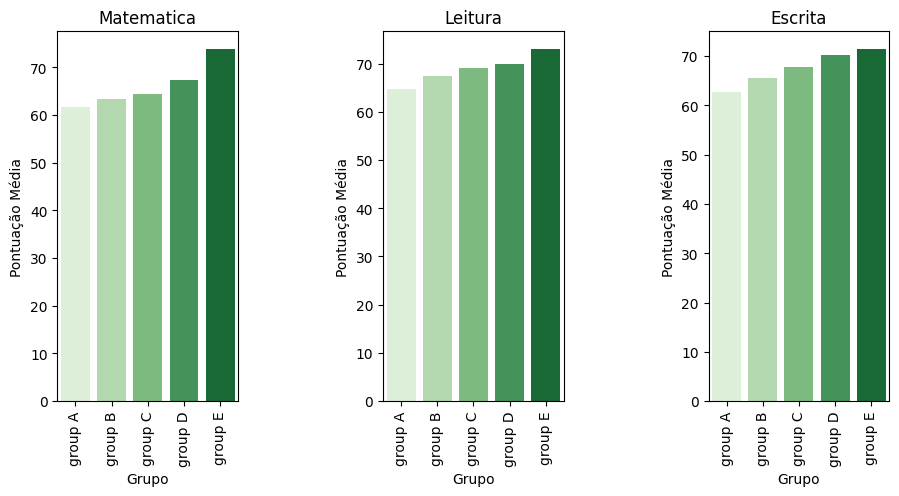

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)

for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = df.groupby("Etnia")[list(df.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Greens")
    plt.xlabel("Grupo")
    plt.ylabel("Pontuação Média")
    plt.xticks(rotation=90)
    plt.title(list(df.columns[-3:])[idx])

plt.show()

Fica claro que o Grupo E possui a melhor performance em todos os campos e o Grupo A possui a pior performance.

Vamos ver os resultados do teste de preparação:

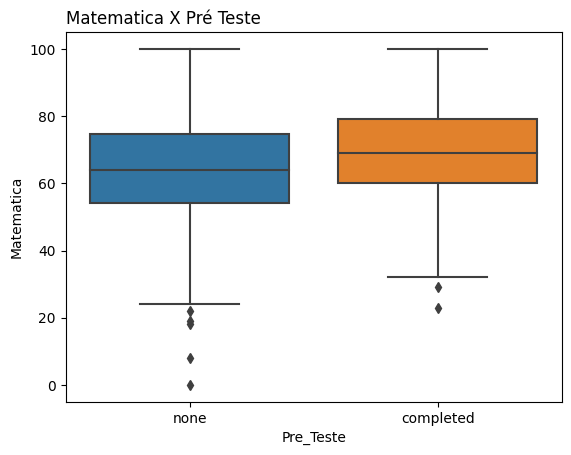

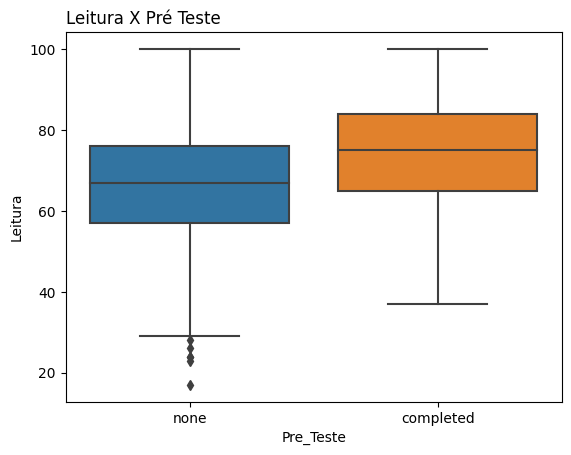

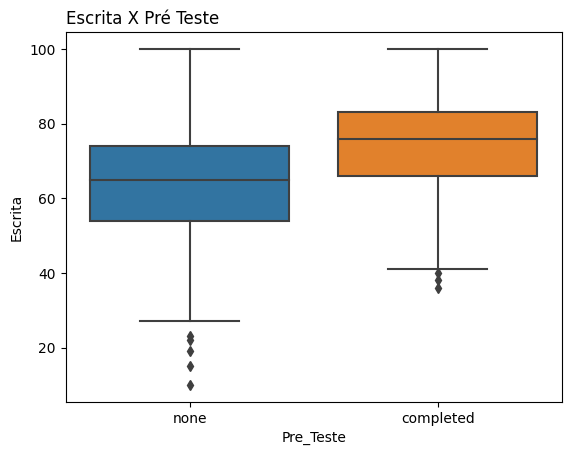

In [ ]:
for item in df.columns[-3:]:
  sns.boxplot(x = df["Pre_Teste"], y = df[item])
  plt.title(item + " X Pré Teste", loc = "left")
  plt.show()

A distribuição das notas fica mais próxima se os alunos completam o teste de prepação antes da prova. Também podemos perceber que a média de notas é melhor.

Vamos fazer o mesmo comparativo com a variável "Lanche":

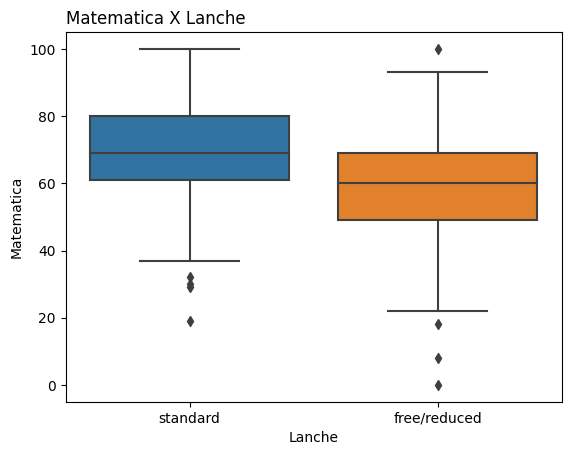

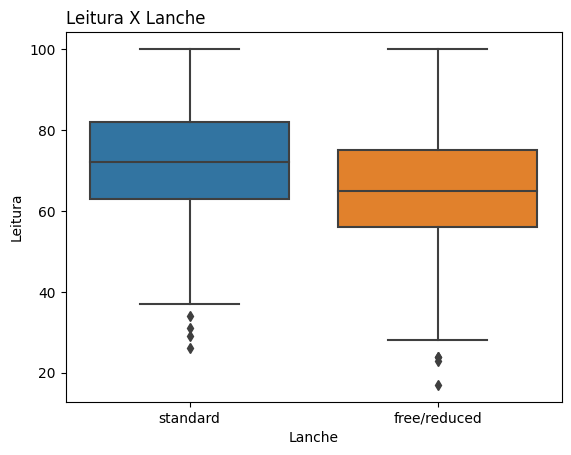

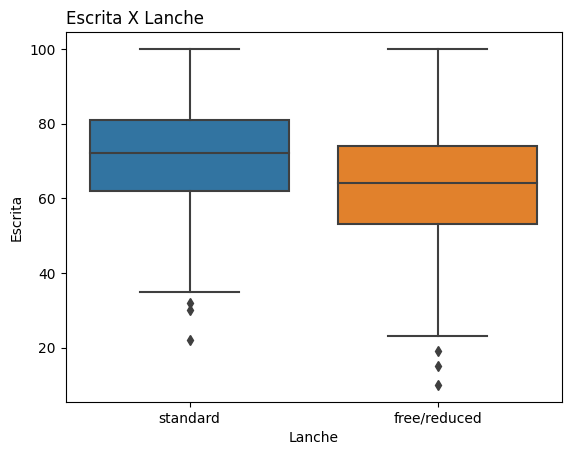

In [ ]:
for item in df.columns[-3:]:
  sns.boxplot(x = df["Lanche"], y = df[item])
  plt.title(item + " X Lanche", loc = "left")
  plt.show()

Faz sentido, os estudantes tendem a obter melhores resultados quando tem lanches regulares.

Agora vamos verificar os tipos de dados nas variáveis:

In [ ]:
df.dtypes

Gênero           object
Etnia            object
Educacao_Pais    object
Lanche           object
Pre_Teste        object
Matematica        int64
Leitura           int64
Escrita           int64
dtype: object

Vamos transformar algumas variáveis com o Label Encoder:

In [ ]:
labelencoder = LabelEncoder()

train_df = df.copy()
train_df["Educacao_Pais"] = labelencoder.fit_transform(train_df["Educacao_Pais"])
train_df["Pre_Teste"] = labelencoder.fit_transform(train_df["Pre_Teste"])
train_df["Lanche"] = labelencoder.fit_transform(train_df["Lanche"])

train_df.head()

,Gênero,Etnia,Educacao_Pais,Lanche,Pre_Teste,Matematica,Leitura,Escrita,Classificacao
0,female,group B,1,1,1,72,72,74,0
1,female,group C,4,1,0,69,90,88,4
2,female,group B,3,1,1,90,95,93,2
3,male,group A,0,0,1,47,57,44,3
4,male,group C,4,1,1,76,78,75,4


Agora que as variáveis "Educacao_Pais", "Lanche" e "Pre_Teste" estão classificadas por números, podemos usar o algoritmo KMeans para classificar o dataset.

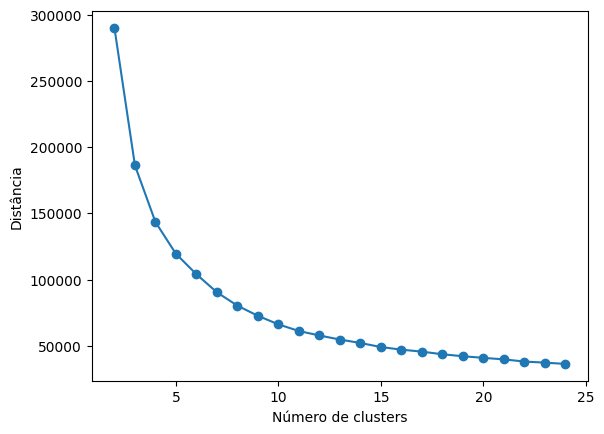

In [ ]:
kmeans_dis = list()

for idx in range(2, 25):
  kmeans = KMeans(init = "k-means++", n_clusters = idx, n_init = 20)
  kmeans.fit_transform(train_df.iloc[:, 2:])
  kmeans_dis.append(kmeans.inertia_)

plt.plot(list(range(2, 25)), kmeans_dis, marker = 'o')
plt.xlabel("Número de clusters")
plt.ylabel("Distância")
plt.show()

Vamos escolher 8 como o cotovelo (quantidade de clusters), depois classificamos todos os dados.

In [ ]:
kmeans = KMeans(init = "k-means++", n_clusters = 8)
kmeans.fit_transform(train_df.iloc[:, 2:])
kmeans_label = kmeans.labels_
df["Classificacao"] = kmeans_label
df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gênero,Etnia,Educacao_Pais,Lanche,Pre_Teste,Matematica,Leitura,Escrita,Classificacao
0,female,group B,bachelor's degree,standard,none,72,72,74,7
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,5
4,male,group C,some college,standard,none,76,78,75,0
5,female,group B,associate's degree,standard,none,71,83,78,0
6,female,group B,some college,standard,completed,88,95,92,2
7,male,group B,some college,free/reduced,none,40,43,39,4
8,male,group D,high school,free/reduced,completed,64,64,67,3
9,female,group B,high school,free/reduced,none,38,60,50,5


Agora vamos ver a performance de cada cluster:

In [ ]:
class_df = df.groupby(["Classificacao"])[df.columns[-4:-1]].mean()
class_df

,Matematica,Leitura,Escrita
Classificacao,,,
0,68.256410,78.179487,77.916667
1,61.160584,58.182482,56.306569
2,88.463918,92.793814,92.690722
3,57.735484,67.490323,67.690323
4,32.135135,35.972973,33.594595
5,47.843972,51.546099,49.333333
6,82.302817,81.823944,80.422535
7,73.407407,69.051852,67.281481


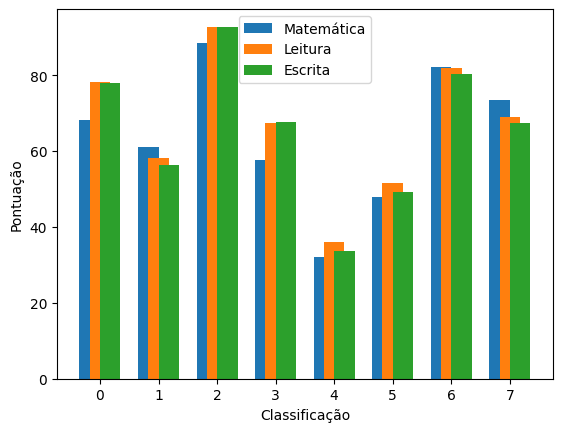

In [ ]:
ind = np.arange(8)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.Matematica, width, label="Matemática")
rects2 = ax.bar(ind, class_df.Leitura, width, label="Leitura")
rects3 = ax.bar(ind + width/2, class_df.Escrita, width, label="Escrita")

ax.set_xlabel("Classificação")
ax.set_ylabel("Pontuação")
ax.set_xticks(ind)
ax.legend()
plt.show()

Até o momento, está claro que todo o conteúdo do cluster tem a mesma tendência, então vamos escolher a média de todo o conteúdo para realizar o ranking dos clusters:

In [ ]:
class_df["Media_Total_Pontos"] = (class_df.Matematica + class_df.Leitura + class_df.Escrita) / 3
rank = class_df["Media_Total_Pontos"].sort_values(ascending = False)
rank.index

Int64Index([2, 6, 0, 7, 3, 1, 5, 4], dtype='int64', name='Classificacao')

In [ ]:
rank

Classificacao
2    91.316151
6    81.516432
0    74.784188
7    69.913580
3    64.305376
1    58.549878
5    49.574468
4    33.900901
Name: Media_Total_Pontos, dtype: float64

A partir de agora, podemos achar a correlação entre a performance dos alunos. Vamos exibir em gráficos de pizza para ver se o nível de educação dos pais pode afetar a performance ou não.

<ipython-input-32-45bc0da35aeb>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, idx+1)


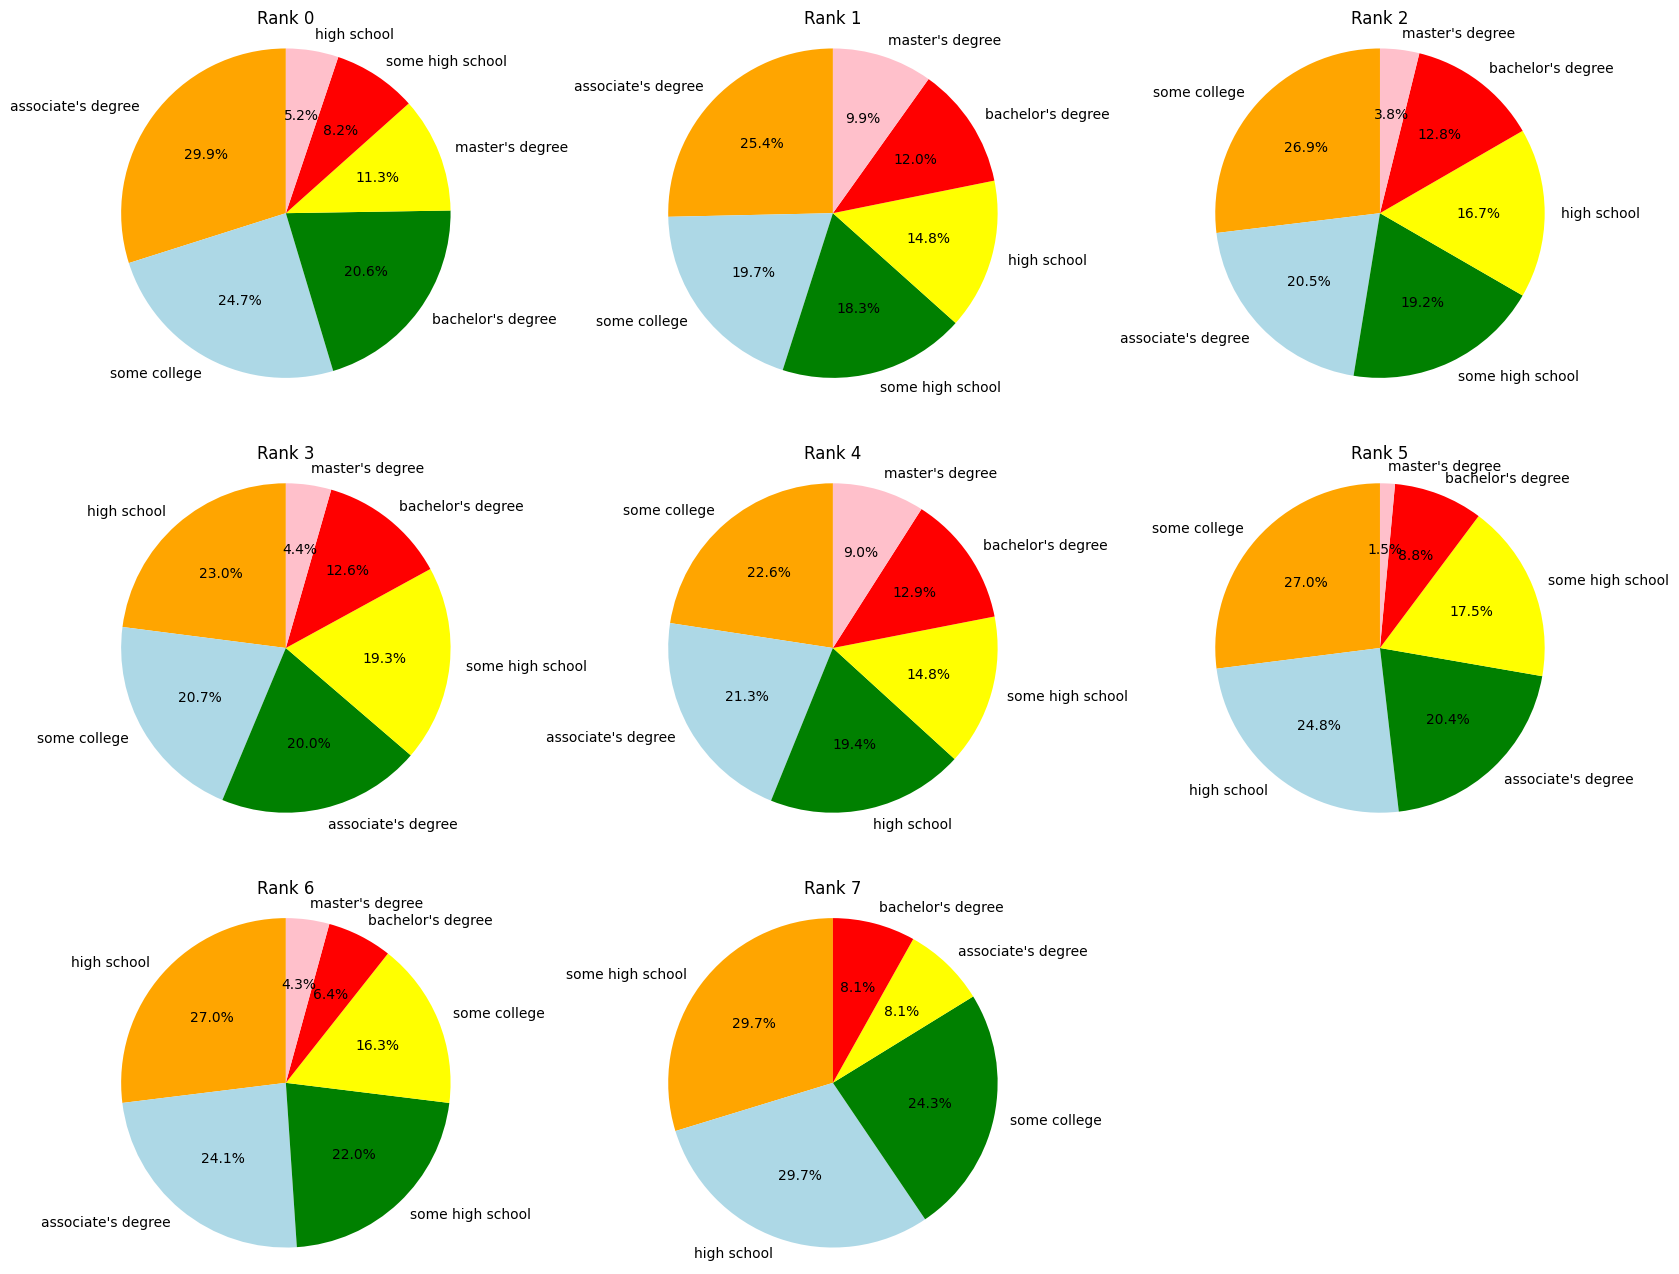

In [ ]:
def plot_pie_chart(column):
    fig, ax = plt.subplots(figsize=(20,16))
    color = ["orange","lightblue","green","yellow","red","pink","brown","gray"]
    for idx in range(8):
        plt.subplot(3, 3, idx+1)
        num = "class" + str(idx)
        num = df[df["Classificacao"]==rank.index[idx]]
        percentage_of_parent_edu = num[column].value_counts()
        percentage_of_parent_edu.sort_index()
        label = percentage_of_parent_edu.index
        value = percentage_of_parent_edu.values
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = color[:len(label)])
        plt.axis("equal")
        plt.title("Rank " + str(idx))
    plt.show()
plot_pie_chart("Educacao_Pais")

Vamos definir como alto nível de educação pais que possuam Bacharel (bachelor's degree) ou Mestrado (master's degree), então vamos focar nesses dois termos.

Como mostrado nos gráficos acima, podemos ver facilmente a proporção de alto nível de educação. Para o Rank 0, seu índice gira em torno de 31%. Além disso, não há diferenças entre os Ranks 1 e 4, e a proporção é de aproximadamente 21%. Por final, a proporção é de apenas 8% no Rank 7.

Nós calculamos a média de pontuação de cada Rank anteriormente, então podemos dizer que o nível de educação dos pais causa uma influência no resultado dos alunos, mas não de maneira significativa pois ainda temos cerca de 70% ~ 80% dos pais sem um alto nível de educação.

E quanto ao Teste de Preparação? Vamos verificar:

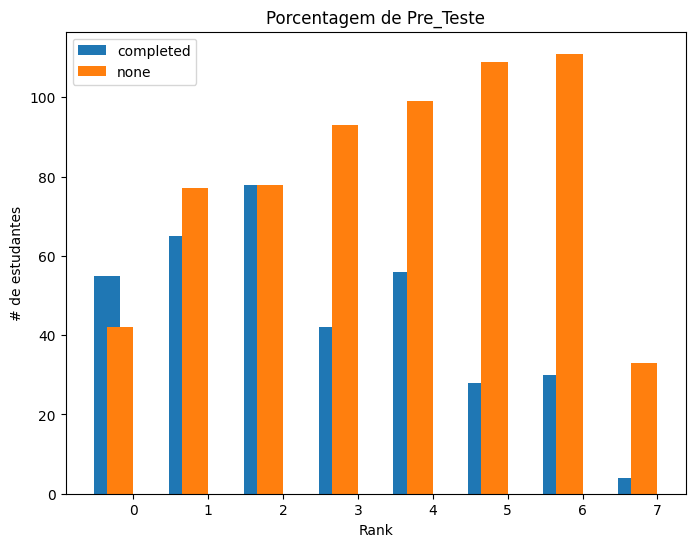

In [ ]:
def plot_bar_chart(column):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(8)
    for idx in range(8):
        num = "class" + str(idx)
        num = df[df["Classificacao"] == rank.index[idx]]
        porcent_da_coluna = num[column].value_counts()
        porcent_da_coluna = porcent_da_coluna.sort_index()
        for key in porcent_da_coluna.index:
          if key not in index_dict.keys():
            index_dict[key] = []
            index_dict[key].append(porcent_da_coluna[key])
          else:
            index_dict[key].append(porcent_da_coluna[key])
    porcent_da_coluna = df[df["Classificacao"] == rank.index[4]][column].value_counts().sort_index()
    for i in range(len(porcent_da_coluna.index)):
      rects = ax.bar(ind - width / (i + 1), index_dict[porcent_da_coluna.index[i]], width, label = porcent_da_coluna.index[i])

    ax.set_xlabel("Rank")
    ax.set_ylabel("# de estudantes")
    ax.set_title("Porcentagem de " + column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()

plot_bar_chart("Pre_Teste")

Mais de 50% dos estudantes no Rank 0 completaram o teste de preparação e tem aproximadamente 70% ~ 80% de estudantes no Rank 7 que não finalizaram. É dito que o teste de preparação pode ajudar os estudantes a conseguir melhores notas.

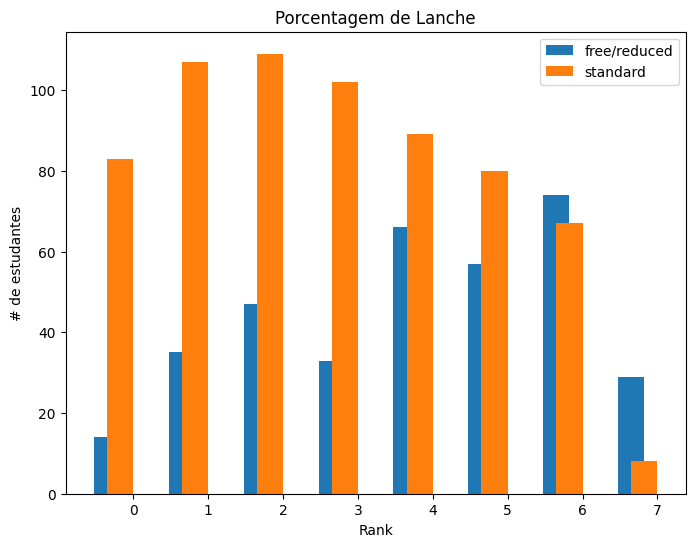

In [ ]:
plot_bar_chart("Lanche")

Verificando a variável "Lanche", percebemos a mesma tendência do "Pre_Teste". Alunos que lancham regularmente antes do teste conseguem resultados melhores, ou seja, é difícil conseguir uma boa performance sem se alimentar.

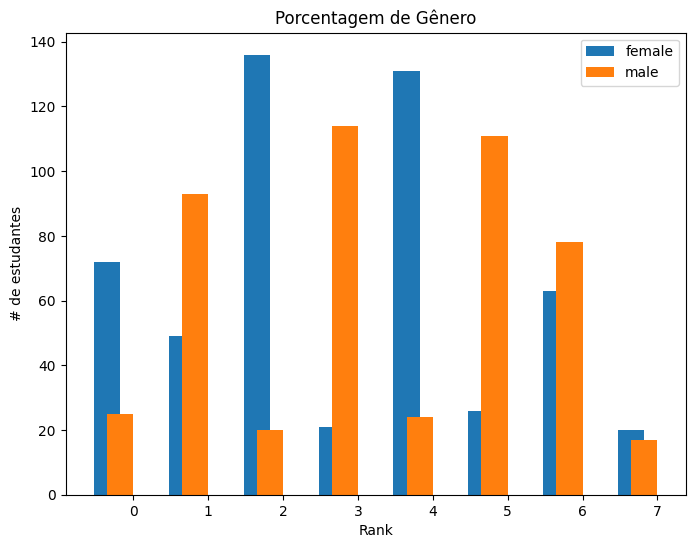

In [ ]:
plot_bar_chart("Gênero")

É difícil dizer que os homens tiveram um desempenho melhor que o das mulheres.

# Conclusões

Podemos tirar algumas conclusões:

1.   O nível de educação dos pais pode afetar a performance dos estudantes, mas não é o fator mais importante.
2.   Terminar o teste de preparação é muito beneficial.
3.   Se alimentar é importante para os estudantes, e aparenta ser um fator importante.
4.   O gênero não aparenta ter uma relação com a pontuação.

Em suma, se os estudantes querem ter uma boa performance eles devem estar bem alimentados e se preparar adequadamente para a prova.


